Import Libraries dan Setup

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi plot agar lebih menarik
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Semua library berhasil diimpor!")


✅ Semua library berhasil diimpor!


Load dan Cleaning Data

In [52]:
def load_and_clean_data(data_path='spotify_history.csv'):
    """Memuat dan membersihkan data Spotify."""
    print("🔧 Memuat dan membersihkan data Spotify...")
    
    # Memuat data
    data = pd.read_csv(data_path)
    print(f"📊 Berhasil memuat {len(data)} rekaman data")
    
    # Konversi timestamp
    data['ts'] = pd.to_datetime(data['ts'])
    data['tanggal'] = data['ts'].dt.date
    data['jam'] = data['ts'].dt.hour
    data['hari'] = data['ts'].dt.day_name()
    data['bulan'] = data['ts'].dt.month_name()
    data['tahun'] = data['ts'].dt.year
    
    # Konversi durasi
    data['menit_diputar'] = data['ms_played'] / (1000 * 60)
    data['detik_diputar'] = data['ms_played'] / 1000
    
    # Menangani missing values
    data['track_name'].fillna('Lagu Tidak Diketahui', inplace=True)
    data['artist_name'].fillna('Artis Tidak Diketahui', inplace=True)
    data['album_name'].fillna('Album Tidak Diketahui', inplace=True)
    
    # Menambahkan fitur kategori waktu
    data['periode_waktu'] = pd.cut(
        data['jam'],
        bins=[0, 6, 12, 18, 24],
        labels=['Malam (0-6)', 'Pagi (6-12)', 'Siang (12-18)', 'Sore (18-24)'],
        include_lowest=True
    )
    
    # Indikator akhir pekan
    data['akhir_pekan'] = data['hari'].isin(['Saturday', 'Sunday'])
    
    # Kategori durasi
    data['kategori_durasi'] = pd.cut(
        data['menit_diputar'],
        bins=[0, 0.5, 2, 5, float('inf')],
        labels=['Sangat Pendek (<30s)', 'Pendek (30s-2m)', 'Sedang (2-5m)', 'Panjang (>5m)']
    )
    
    print("✅ Data berhasil dibersihkan!")
    return data

# Memuat data
spotify_data = load_and_clean_data('spotify_history.csv')

print(f"\n📈 Ringkasan Data:")
print(f"Total sesi mendengarkan: {len(spotify_data):,}")
print(f"Lagu unik: {spotify_data['track_name'].nunique():,}")
print(f"Artis unik: {spotify_data['artist_name'].nunique():,}")
print(f"Total waktu mendengarkan: {spotify_data['menit_diputar'].sum():.1f} menit ({spotify_data['menit_diputar'].sum()/60:.1f} jam)")


🔧 Memuat dan membersihkan data Spotify...
📊 Berhasil memuat 149860 rekaman data
✅ Data berhasil dibersihkan!

📈 Ringkasan Data:
Total sesi mendengarkan: 149,860
Lagu unik: 13,839
Artis unik: 4,113
Total waktu mendengarkan: 320492.2 menit (5341.5 jam)


Pertanyaan 1 - Siapa artis favorit pengguna Spotify?

🎤 PERTANYAAN 1: Siapa artis favorit Pengguna Spotify?


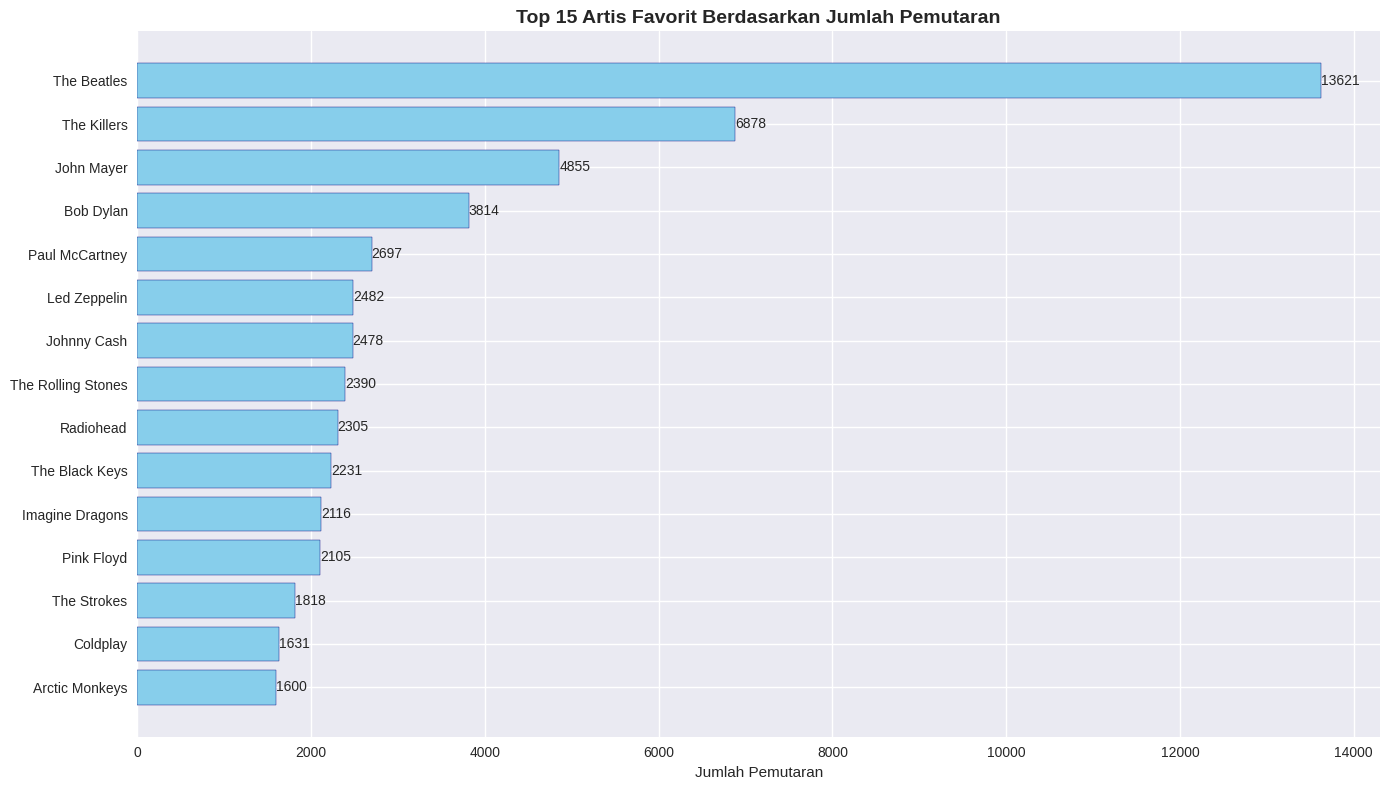


🎵 Artis Favorit Berdasarkan Total Waktu Mendengarkan:
 1. The Beatles: 20169.7 menit (336.2 jam)
 2. The Killers: 17659.3 menit (294.3 jam)
 3. John Mayer: 12087.0 menit (201.4 jam)
 4. Bob Dylan: 9490.9 menit (158.2 jam)
 5. Paul McCartney: 5955.9 menit (99.3 jam)
 6. Howard Shore: 5815.5 menit (96.9 jam)
 7. The Strokes: 5291.8 menit (88.2 jam)
 8. The Rolling Stones: 5132.0 menit (85.5 jam)
 9. Pink Floyd: 4342.2 menit (72.4 jam)
10. Led Zeppelin: 4139.0 menit (69.0 jam)

✨ JAWABAN: Artis favorit mayoritas pengguna Spotify adalah The Beatles dengan 13621 kali pemutaran!


In [53]:
print("🎤 PERTANYAAN 1: Siapa artis favorit Pengguna Spotify?")
print("=" * 60)

# Analisis artis teratas berdasarkan jumlah pemutaran
top_artists = spotify_data['artist_name'].value_counts().head(15)

# Membuat visualisasi
plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(top_artists)), top_artists.values, color='skyblue', edgecolor='navy')
plt.yticks(range(len(top_artists)), top_artists.index)
plt.xlabel('Jumlah Pemutaran')
plt.title('Top 15 Artis Favorit Berdasarkan Jumlah Pemutaran', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Menambahkan nilai pada bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

# Analisis berdasarkan waktu mendengarkan
print("\n🎵 Artis Favorit Berdasarkan Total Waktu Mendengarkan:")
artist_time = spotify_data.groupby('artist_name')['menit_diputar'].sum().sort_values(ascending=False).head(10)
for i, (artist, minutes) in enumerate(artist_time.items(), 1):
    print(f"{i:2d}. {artist}: {minutes:.1f} menit ({minutes/60:.1f} jam)")

print(f"\n✨ JAWABAN: Artis favorit mayoritas pengguna Spotify adalah {top_artists.index[0]} dengan {top_artists.iloc[0]} kali pemutaran!")


Pertanyaan 2 - Lagu apa yang paling sering didengarkan?


🎵 PERTANYAAN 2: Lagu apa yang paling sering Pengguna Spotify dengarkan?
🏆 Top 15 Lagu Paling Sering Diputar:
 1. Ode To The Mets - The Strokes
    📊 207 kali diputar, 1123.9 menit total
 2. In the Blood - John Mayer
    📊 181 kali diputar, 640.5 menit total
 3. Dying Breed - The Killers
    📊 166 kali diputar, 603.0 menit total
 4. Caution - The Killers
    📊 164 kali diputar, 593.7 menit total
 5. 19 Dias y 500 Noches - En Directo - Joaquín Sabina
    📊 148 kali diputar, 715.2 menit total
 6. Concerning Hobbits - Howard Shore
    📊 142 kali diputar, 320.7 menit total
 7. All These Things That I've Done - The Killers
    📊 142 kali diputar, 595.9 menit total
 8. Come Together - Remastered 2009 - The Beatles
    📊 137 kali diputar, 378.0 menit total
 9. Yesterday - Remastered 2009 - The Beatles
    📊 134 kali diputar, 248.9 menit total
10. Crucify Your Mind - Rodríguez
    📊 131 kali diputar, 330.7 menit total
11. Cavalleria rusticana: Intermezzo - Pietro Mascagni
    📊 128 kali diputa

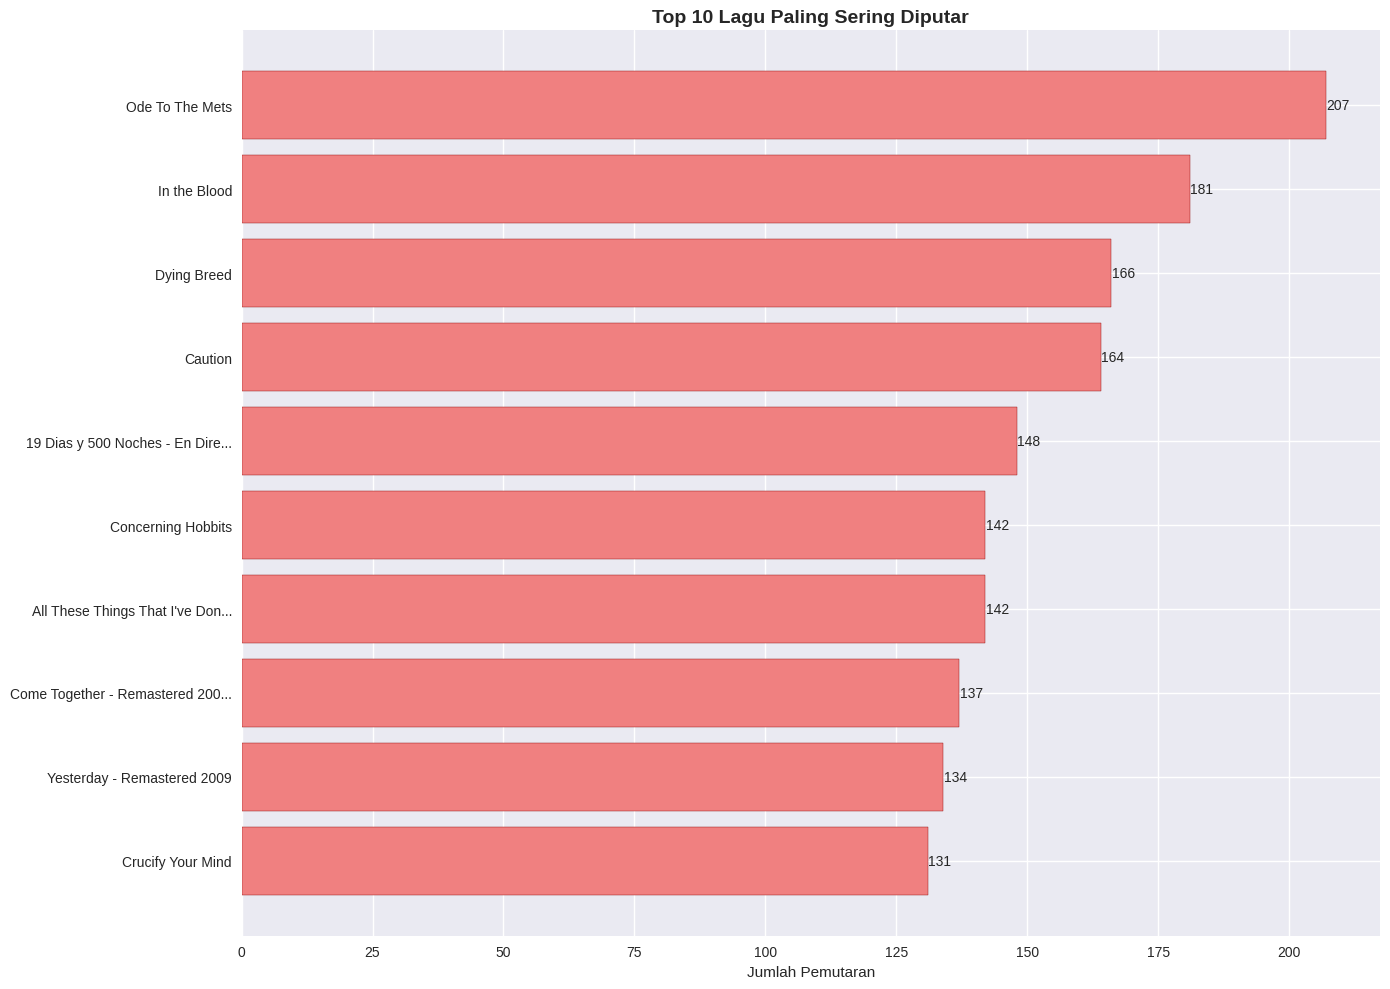


✨ JAWABAN: Lagu favorit pengguna dalam datasets adalah 'Ode To The Mets' oleh The Strokes dengan 207 kali pemutaran!


In [54]:
print("\n🎵 PERTANYAAN 2: Lagu apa yang paling sering Pengguna Spotify dengarkan?")
print("=" * 60)

# Analisis lagu teratas
top_songs = spotify_data.groupby(['track_name', 'artist_name']).size().sort_values(ascending=False).head(15)

print("🏆 Top 15 Lagu Paling Sering Diputar:")
for i, ((song, artist), count) in enumerate(top_songs.items(), 1):
    # Hitung total waktu mendengarkan untuk lagu ini
    song_data = spotify_data[(spotify_data['track_name'] == song) & 
                           (spotify_data['artist_name'] == artist)]
    total_minutes = song_data['menit_diputar'].sum()
    print(f"{i:2d}. {song} - {artist}")
    print(f"    📊 {count} kali diputar, {total_minutes:.1f} menit total")

# Visualisasi
plt.figure(figsize=(14, 10))
song_labels = [f"{song[:30]}..." if len(song) > 30 else song 
               for song, artist in top_songs.head(10).index]
bars = plt.barh(range(len(top_songs.head(10))), top_songs.head(10).values, 
                color='lightcoral', edgecolor='darkred')
plt.yticks(range(len(top_songs.head(10))), song_labels)
plt.xlabel('Jumlah Pemutaran')
plt.title('Top 10 Lagu Paling Sering Diputar', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

top_song, top_artist = top_songs.index[0]
print(f"\n✨ JAWABAN: Lagu favorit pengguna dalam datasets adalah '{top_song}' oleh {top_artist} dengan {top_songs.iloc[0]} kali pemutaran!")


Pertanyaan 3 - Kapan pengguna spotify paling aktif mendengarkan musik?


⏰ PERTANYAAN 3: Kapan pengguna spotify paling aktif mendengarkan musik?


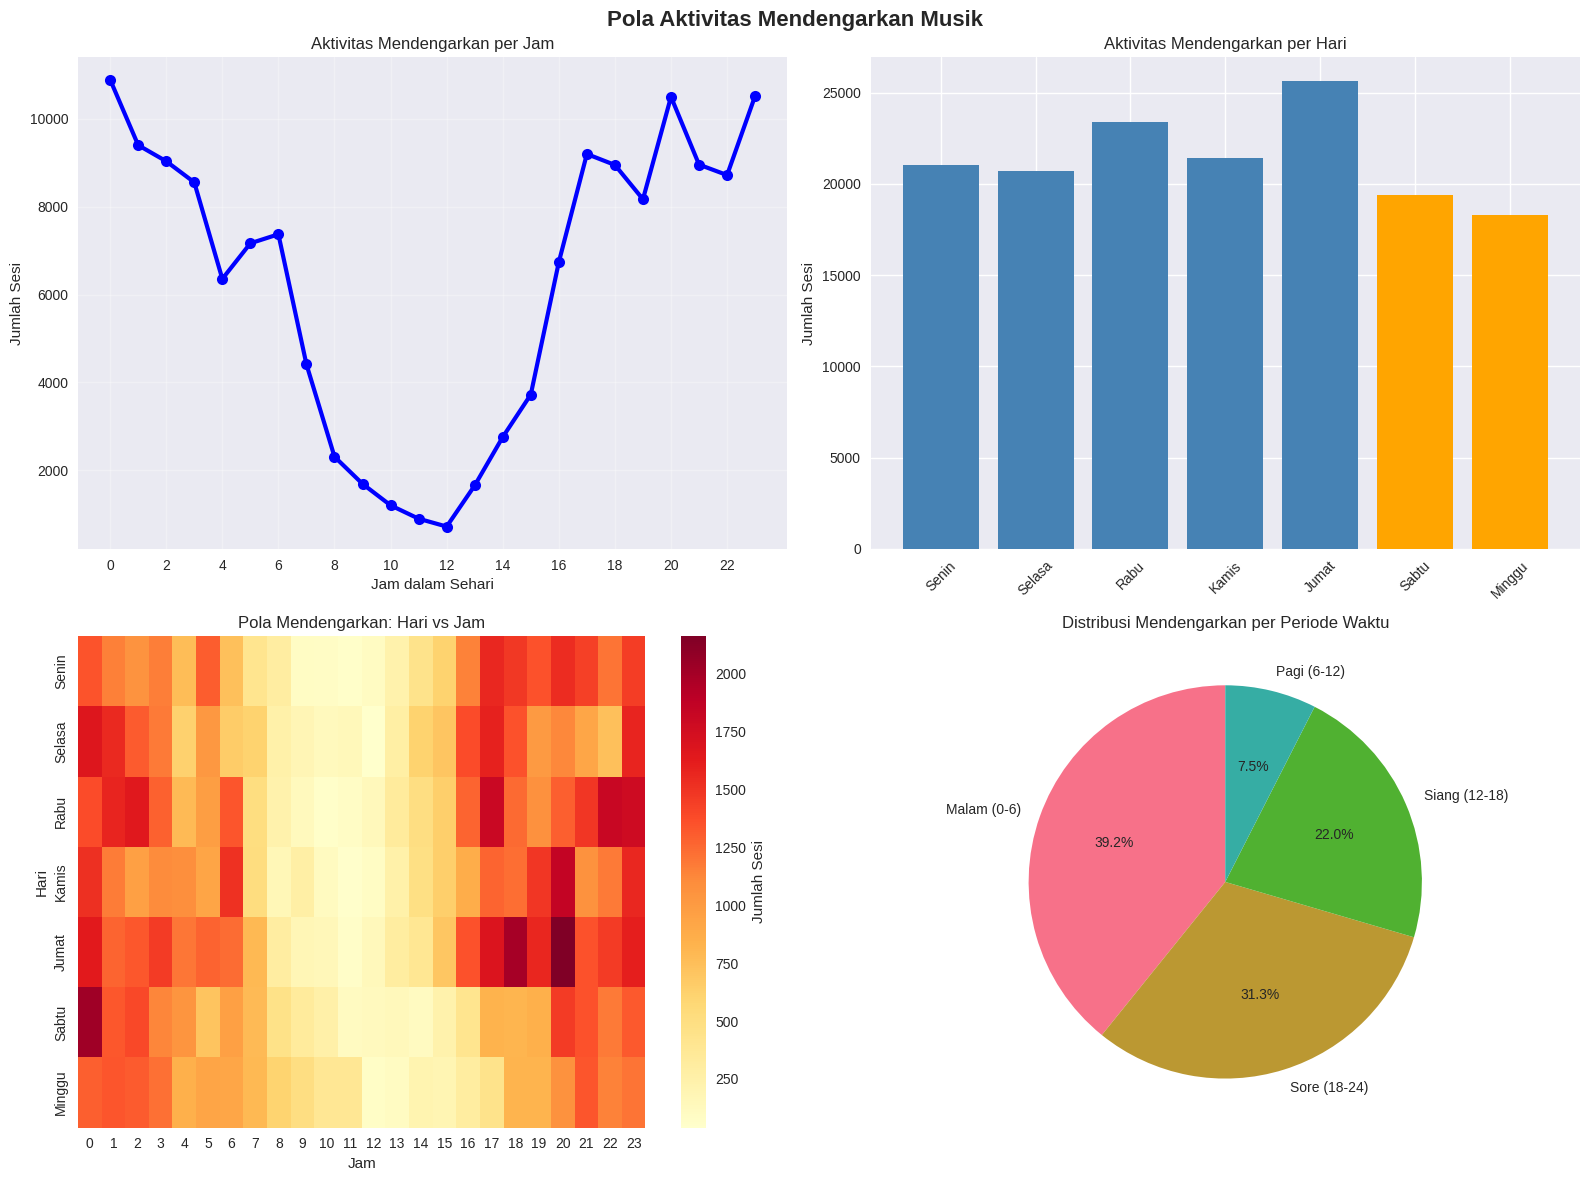

📊 Jam tersibuk: 0:00 dengan 10884 sesi
📅 Hari tersibuk: Jumat dengan 25646 sesi
🕐 Periode tersibuk: Malam (0-6) dengan 58746 sesi

📈 Perbandingan Akhir Pekan vs Hari Kerja:
   Akhir pekan: 37,671 sesi (25.1%)
   Hari kerja: 112,189 sesi (74.9%)

✨ JAWABAN: Pengguna Spotify paling aktif mendengarkan musik pada jam 0:00 di hari Jumat!


In [55]:
print("\n⏰ PERTANYAAN 3: Kapan pengguna spotify paling aktif mendengarkan musik?")
print("=" * 60)

# Analisis berdasarkan jam
hourly_listening = spotify_data['jam'].value_counts().sort_index()

# Analisis berdasarkan hari
hari_indonesia = {
    'Monday': 'Senin', 'Tuesday': 'Selasa', 'Wednesday': 'Rabu',
    'Thursday': 'Kamis', 'Friday': 'Jumat', 'Saturday': 'Sabtu', 'Sunday': 'Minggu'
}
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_listening = spotify_data['hari'].value_counts().reindex(day_order)

# Visualisasi pola mendengarkan
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Pola Aktivitas Mendengarkan Musik', fontsize=16, fontweight='bold')

# 1. Pola per jam
axes[0, 0].plot(hourly_listening.index, hourly_listening.values, 
                marker='o', linewidth=3, markersize=8, color='blue')
axes[0, 0].set_title('Aktivitas Mendengarkan per Jam')
axes[0, 0].set_xlabel('Jam dalam Sehari')
axes[0, 0].set_ylabel('Jumlah Sesi')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))

# 2. Pola per hari
day_labels = [hari_indonesia[day] for day in day_order]
colors = ['orange' if day in ['Saturday', 'Sunday'] else 'steelblue' for day in day_order]
axes[0, 1].bar(range(len(daily_listening)), daily_listening.values, color=colors)
axes[0, 1].set_xticks(range(len(daily_listening)))
axes[0, 1].set_xticklabels(day_labels, rotation=45)
axes[0, 1].set_title('Aktivitas Mendengarkan per Hari')
axes[0, 1].set_ylabel('Jumlah Sesi')

# 3. Heatmap jam vs hari
heatmap_data = spotify_data.groupby(['hari', 'jam']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(day_order)
heatmap_data.index = day_labels

sns.heatmap(heatmap_data, cmap='YlOrRd', ax=axes[1, 0], 
            cbar_kws={'label': 'Jumlah Sesi'})
axes[1, 0].set_title('Pola Mendengarkan: Hari vs Jam')
axes[1, 0].set_xlabel('Jam')
axes[1, 0].set_ylabel('Hari')

# 4. Periode waktu
periode_listening = spotify_data['periode_waktu'].value_counts()
axes[1, 1].pie(periode_listening.values, labels=periode_listening.index, 
               autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribusi Mendengarkan per Periode Waktu')

plt.tight_layout()
plt.show()

# Analisis detail
peak_hour = hourly_listening.idxmax()
peak_day = hari_indonesia[daily_listening.idxmax()]
peak_period = periode_listening.idxmax()

print(f"📊 Jam tersibuk: {peak_hour}:00 dengan {hourly_listening[peak_hour]} sesi")
print(f"📅 Hari tersibuk: {peak_day} dengan {daily_listening.max()} sesi")
print(f"🕐 Periode tersibuk: {peak_period} dengan {periode_listening.max()} sesi")

# Analisis weekend vs weekday
weekend_sessions = len(spotify_data[spotify_data['akhir_pekan']])
weekday_sessions = len(spotify_data[~spotify_data['akhir_pekan']])

print(f"\n📈 Perbandingan Akhir Pekan vs Hari Kerja:")
print(f"   Akhir pekan: {weekend_sessions:,} sesi ({weekend_sessions/len(spotify_data)*100:.1f}%)")
print(f"   Hari kerja: {weekday_sessions:,} sesi ({weekday_sessions/len(spotify_data)*100:.1f}%)")

print(f"\n✨ JAWABAN: Pengguna Spotify paling aktif mendengarkan musik pada jam {peak_hour}:00 di hari {peak_day}!")


Pertanyaan 4 - Seberapa sering pengguna Spotify skip lagu?


⏭️ PERTANYAAN 4: Seberapa sering Pengguna Spotify skip lagu?
📊 Tingkat Skip Keseluruhan: 5.3%
📈 Total Lagu yang Di-skip: 7,869 dari 149,860 sesi


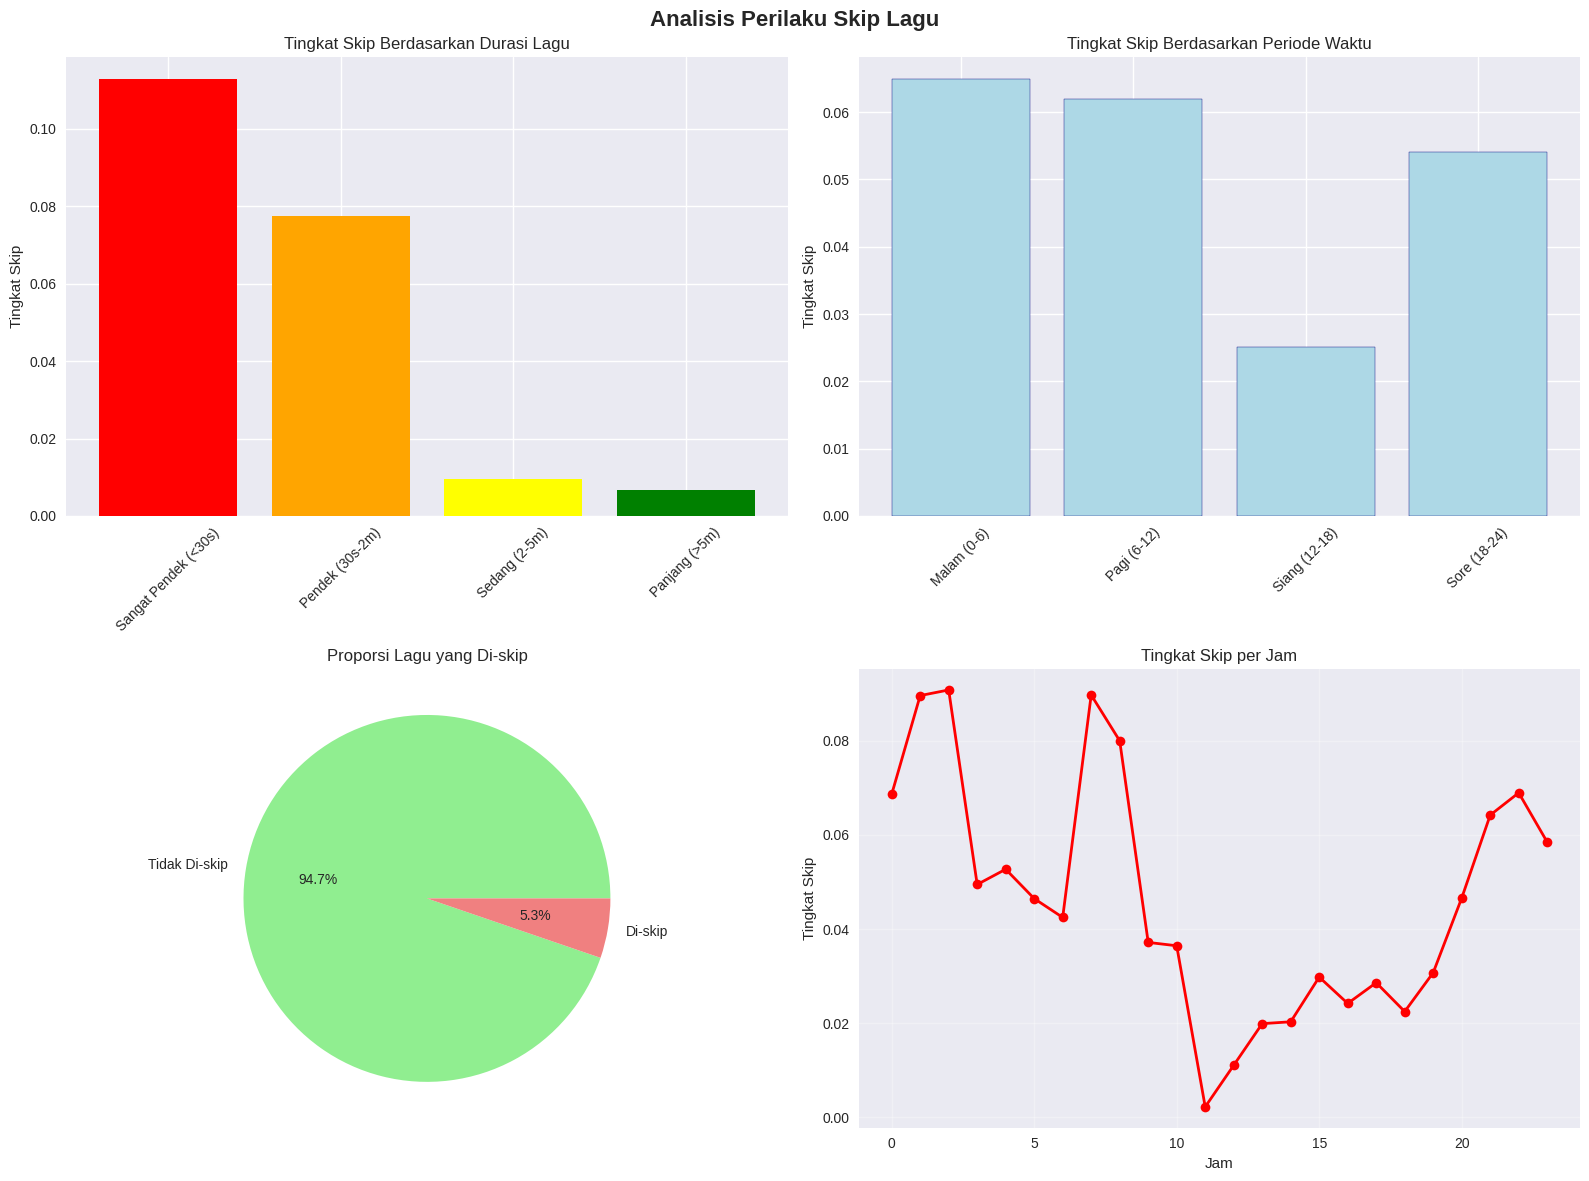


⏭️ Artis yang Paling Sering Di-skip (minimal 10 pemutaran):
 1. Aleks Syntek: 94.7% (19.0 pemutaran)
 2. Fuego: 93.3% (15.0 pemutaran)
 3. Fetty Wap: 91.7% (12.0 pemutaran)
 4. Romeo Santos: 91.7% (12.0 pemutaran)
 5. Dvicio: 86.5% (37.0 pemutaran)
 6. Cody Simpson: 85.7% (28.0 pemutaran)
 7. El Bebeto: 84.6% (13.0 pemutaran)
 8. Banda Tierra Sagrada: 83.3% (18.0 pemutaran)
 9. The Notorious B.I.G.: 82.9% (41.0 pemutaran)
10. Travis Atreo: 80.0% (10.0 pemutaran)

✨ JAWABAN: Pengguna Spotify men-skip 5.3% dari semua lagu yang diputar!


In [56]:
print("\n⏭️ PERTANYAAN 4: Seberapa sering Pengguna Spotify skip lagu?")
print("=" * 60)

if 'skipped' in spotify_data.columns:
    # Analisis skip rate
    overall_skip_rate = spotify_data['skipped'].mean()
    total_skips = spotify_data['skipped'].sum()
    
    print(f"📊 Tingkat Skip Keseluruhan: {overall_skip_rate:.1%}")
    print(f"📈 Total Lagu yang Di-skip: {total_skips:,} dari {len(spotify_data):,} sesi")
    
    # Skip rate berdasarkan durasi
    skip_by_duration = spotify_data.groupby('kategori_durasi')['skipped'].agg(['count', 'mean'])
    
    # Skip rate berdasarkan waktu
    skip_by_time = spotify_data.groupby('periode_waktu')['skipped'].agg(['count', 'mean'])
    
    # Visualisasi
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Analisis Perilaku Skip Lagu', fontsize=16, fontweight='bold')
    
    # 1. Skip rate berdasarkan durasi
    axes[0, 0].bar(range(len(skip_by_duration)), skip_by_duration['mean'].values, 
                   color=['red', 'orange', 'yellow', 'green'])
    axes[0, 0].set_xticks(range(len(skip_by_duration)))
    axes[0, 0].set_xticklabels(skip_by_duration.index, rotation=45)
    axes[0, 0].set_title('Tingkat Skip Berdasarkan Durasi Lagu')
    axes[0, 0].set_ylabel('Tingkat Skip')
    
    # 2. Skip rate berdasarkan periode waktu
    axes[0, 1].bar(range(len(skip_by_time)), skip_by_time['mean'].values, 
                   color='lightblue', edgecolor='navy')
    axes[0, 1].set_xticks(range(len(skip_by_time)))
    axes[0, 1].set_xticklabels(skip_by_time.index, rotation=45)
    axes[0, 1].set_title('Tingkat Skip Berdasarkan Periode Waktu')
    axes[0, 1].set_ylabel('Tingkat Skip')
    
    # 3. Distribusi lagu yang di-skip vs tidak
    skip_counts = spotify_data['skipped'].value_counts()
    axes[1, 0].pie([skip_counts[False], skip_counts[True]], 
                   labels=['Tidak Di-skip', 'Di-skip'], 
                   autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    axes[1, 0].set_title('Proporsi Lagu yang Di-skip')
    
    # 4. Skip rate per jam
    hourly_skip = spotify_data.groupby('jam')['skipped'].mean()
    axes[1, 1].plot(hourly_skip.index, hourly_skip.values, 
                    marker='o', linewidth=2, color='red')
    axes[1, 1].set_title('Tingkat Skip per Jam')
    axes[1, 1].set_xlabel('Jam')
    axes[1, 1].set_ylabel('Tingkat Skip')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analisis artis yang paling sering di-skip
    artist_skip_stats = spotify_data.groupby('artist_name').agg({
        'skipped': ['count', 'sum', 'mean'],
        'track_name': 'count'
    })
    
    # Filter artis dengan minimal 10 pemutaran
    min_plays = 10
    artist_skip_filtered = artist_skip_stats[artist_skip_stats[('track_name', 'count')] >= min_plays]
    most_skipped_artists = artist_skip_filtered.nlargest(10, ('skipped', 'mean'))
    
    print(f"\n⏭️ Artis yang Paling Sering Di-skip (minimal {min_plays} pemutaran):")
    for i, (artist, stats) in enumerate(most_skipped_artists.iterrows(), 1):
        skip_rate = stats[('skipped', 'mean')]
        total_plays = stats[('track_name', 'count')]
        print(f"{i:2d}. {artist}: {skip_rate:.1%} ({total_plays} pemutaran)")
    
    print(f"\n✨ JAWABAN: Pengguna Spotify men-skip {overall_skip_rate:.1%} dari semua lagu yang diputar!")
    
else:
    print("❌ Data tentang skip tidak tersedia dalam dataset ini.")


Pertanyaan 5 - Berapa lama durasi rata-rata Pengguna Spotify mendengarkan lagu?


⏱️ PERTANYAAN 5: Berapa lama durasi rata-rata saya mendengarkan lagu?
📊 Statistik Durasi Mendengarkan:
   Rata-rata: 2.14 menit
   Median: 2.31 menit
   Total waktu: 5341.5 jam


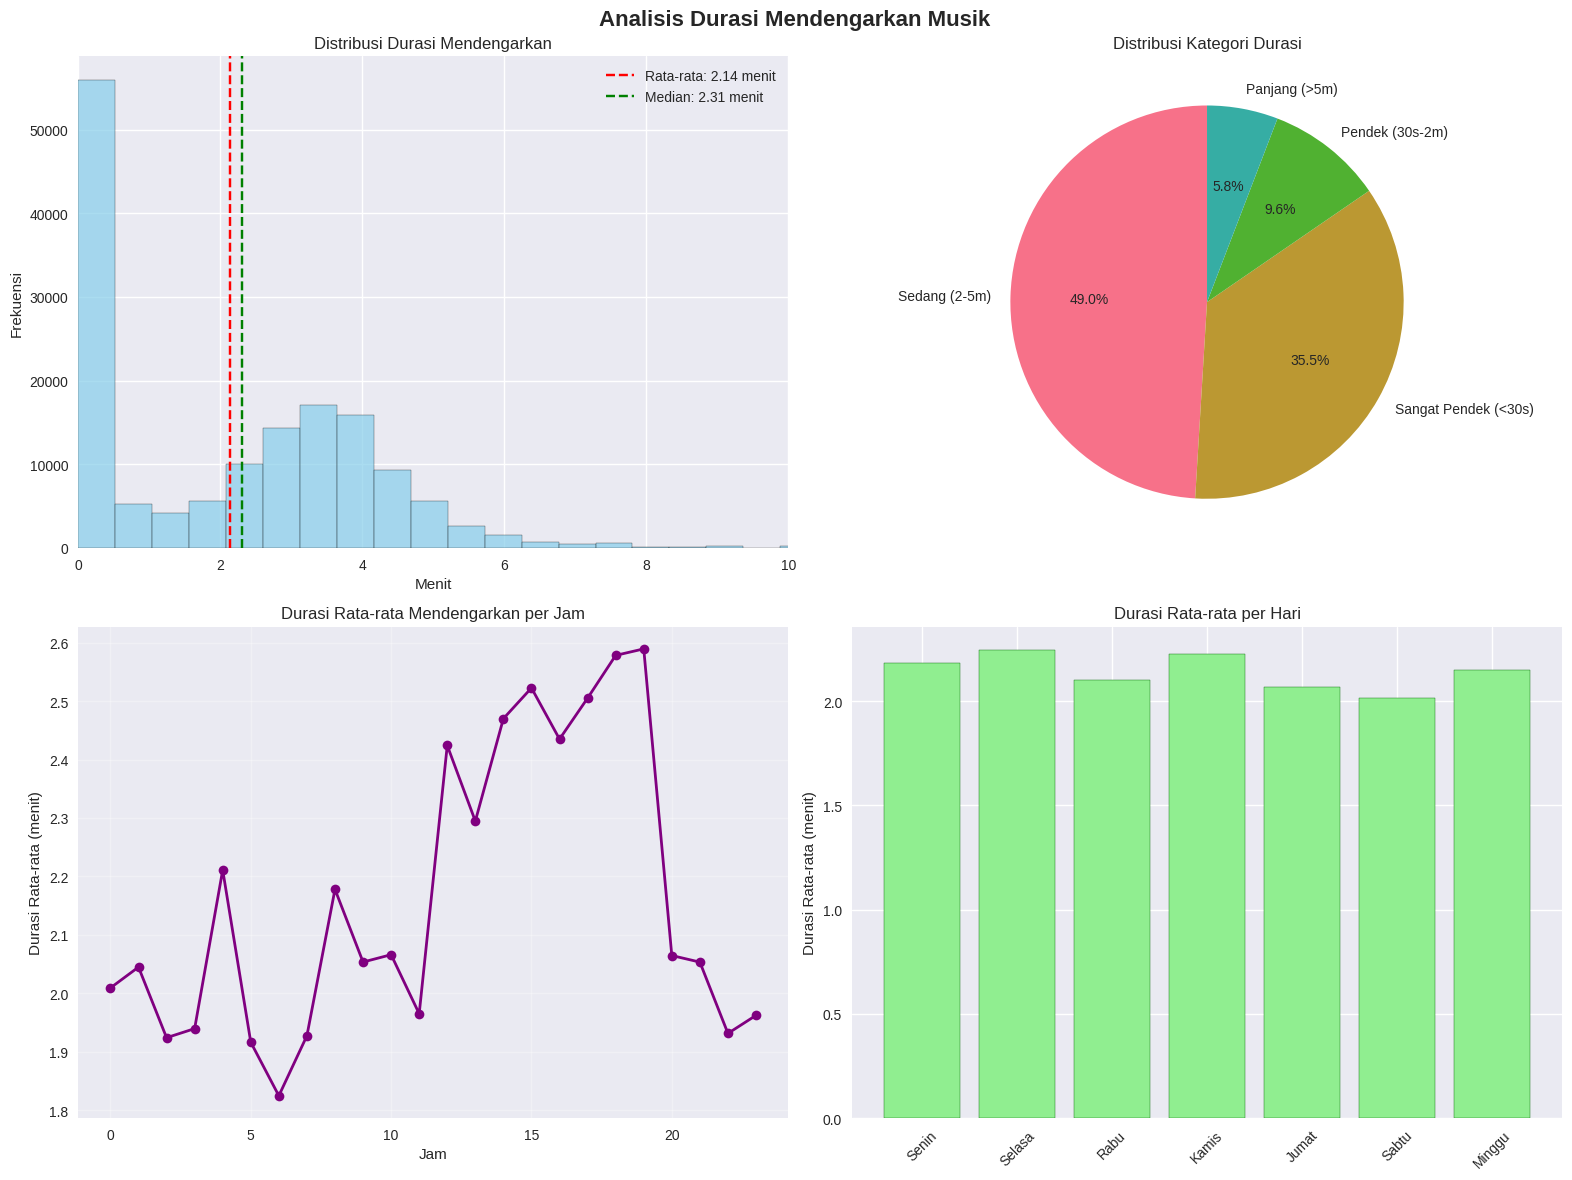


📈 Detail Kategori Durasi:
   Sedang (2-5m): 71,659 sesi (47.8%)
   Sangat Pendek (<30s): 51,933 sesi (34.7%)
   Pendek (30s-2m): 14,014 sesi (9.4%)
   Panjang (>5m): 8,521 sesi (5.7%)

🎵 Sesi Mendengarkan Terpanjang:
 1. Tubular Bells - Pt. I - Mike Oldfield: 26.02 menit
 2. Tubular Bells - Pt. II - Mike Oldfield: 23.29 menit
 3. Nothing Left To Say / Rocks - Medley - Imagine Dragons: 21.99 menit
 4. Desolation Row - Bob Dylan: 20.16 menit
 5. Human Sadness - The Voidz: 19.04 menit
 6. Epilogue (Finale) - Live - Colm Wilkinson: 18.04 menit
 7. Dogs - Pink Floyd: 17.09 menit
 8. Dogs - Pink Floyd: 17.09 menit
 9. Dogs - Pink Floyd: 17.09 menit
10. Dogs - Pink Floyd: 17.09 menit

✨ JAWABAN: Durasi rata-rata mendengarkan lagu Anda adalah 2.14 menit!


In [57]:
print("\n⏱️ PERTANYAAN 5: Berapa lama durasi rata-rata saya mendengarkan lagu?")
print("=" * 60)

# Statistik durasi mendengarkan
rata_rata_menit = spotify_data['menit_diputar'].mean()
median_menit = spotify_data['menit_diputar'].median()
total_jam = spotify_data['menit_diputar'].sum() / 60

print(f"📊 Statistik Durasi Mendengarkan:")
print(f"   Rata-rata: {rata_rata_menit:.2f} menit")
print(f"   Median: {median_menit:.2f} menit")
print(f"   Total waktu: {total_jam:.1f} jam")

# Distribusi kategori durasi
duration_dist = spotify_data['kategori_durasi'].value_counts()

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analisis Durasi Mendengarkan Musik', fontsize=16, fontweight='bold')

# 1. Histogram durasi
axes[0, 0].hist(spotify_data['menit_diputar'], bins=50, alpha=0.7, 
                color='skyblue', edgecolor='black')
axes[0, 0].axvline(rata_rata_menit, color='red', linestyle='--', 
                   label=f'Rata-rata: {rata_rata_menit:.2f} menit')
axes[0, 0].axvline(median_menit, color='green', linestyle='--', 
                   label=f'Median: {median_menit:.2f} menit')
axes[0, 0].set_title('Distribusi Durasi Mendengarkan')
axes[0, 0].set_xlabel('Menit')
axes[0, 0].set_ylabel('Frekuensi')
axes[0, 0].set_xlim(0, 10)  # Fokus pada 0-10 menit
axes[0, 0].legend()

# 2. Kategori durasi
axes[0, 1].pie(duration_dist.values, labels=duration_dist.index, 
               autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribusi Kategori Durasi')

# 3. Durasi rata-rata per jam
hourly_duration = spotify_data.groupby('jam')['menit_diputar'].mean()
axes[1, 0].plot(hourly_duration.index, hourly_duration.values, 
                marker='o', linewidth=2, color='purple')
axes[1, 0].set_title('Durasi Rata-rata Mendengarkan per Jam')
axes[1, 0].set_xlabel('Jam')
axes[1, 0].set_ylabel('Durasi Rata-rata (menit)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Durasi per hari
daily_duration = spotify_data.groupby('hari')['menit_diputar'].mean().reindex(day_order)
day_labels = [hari_indonesia[day] for day in day_order]
axes[1, 1].bar(range(len(daily_duration)), daily_duration.values, 
               color='lightgreen', edgecolor='darkgreen')
axes[1, 1].set_xticks(range(len(daily_duration)))
axes[1, 1].set_xticklabels(day_labels, rotation=45)
axes[1, 1].set_title('Durasi Rata-rata per Hari')
axes[1, 1].set_ylabel('Durasi Rata-rata (menit)')

plt.tight_layout()
plt.show()

# Analisis detail per kategori
print(f"\n📈 Detail Kategori Durasi:")
for kategori, jumlah in duration_dist.items():
    persentase = (jumlah / len(spotify_data)) * 100
    print(f"   {kategori}: {jumlah:,} sesi ({persentase:.1f}%)")

# Lagu dengan durasi terpanjang
longest_sessions = spotify_data.nlargest(10, 'menit_diputar')[['track_name', 'artist_name', 'menit_diputar']]
print(f"\n🎵 Sesi Mendengarkan Terpanjang:")
for i, (_, row) in enumerate(longest_sessions.iterrows(), 1):
    print(f"{i:2d}. {row['track_name']} - {row['artist_name']}: {row['menit_diputar']:.2f} menit")

print(f"\n✨ JAWABAN: Durasi rata-rata mendengarkan lagu Anda adalah {rata_rata_menit:.2f} menit!")
